# MULTIPLE REGRESSION PROJECT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.getcwd()

'C:\\Users\\sony\\Desktop\\Python'

In [3]:
data=pd.read_csv('OnlineNewsPopularity.csv')

In [4]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
data.shape

(39644, 61)

### Statistical Exploration

In [6]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
timedelta                         39644 non-null float64
n_tokens_title                    39644 non-null float64
n_tokens_content                  39644 non-null float64
n_unique_tokens                   39644 non-null float64
n_non_stop_words                  39644 non-null float64
n_non_stop_unique_tokens          39644 non-null float64
num_hrefs                         39644 non-null float64
num_self_hrefs                    39644 non-null float64
num_imgs                          39644 non-null float64
num_videos                        39644 non-null float64
average_token_length              39644 non-null float64
num_keywords                      39644 non-null float64
data_channel_is_lifestyle         39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus               396

In [8]:
data.drop(['url'],axis=1,inplace=True)

## Exploratory Data Analysis

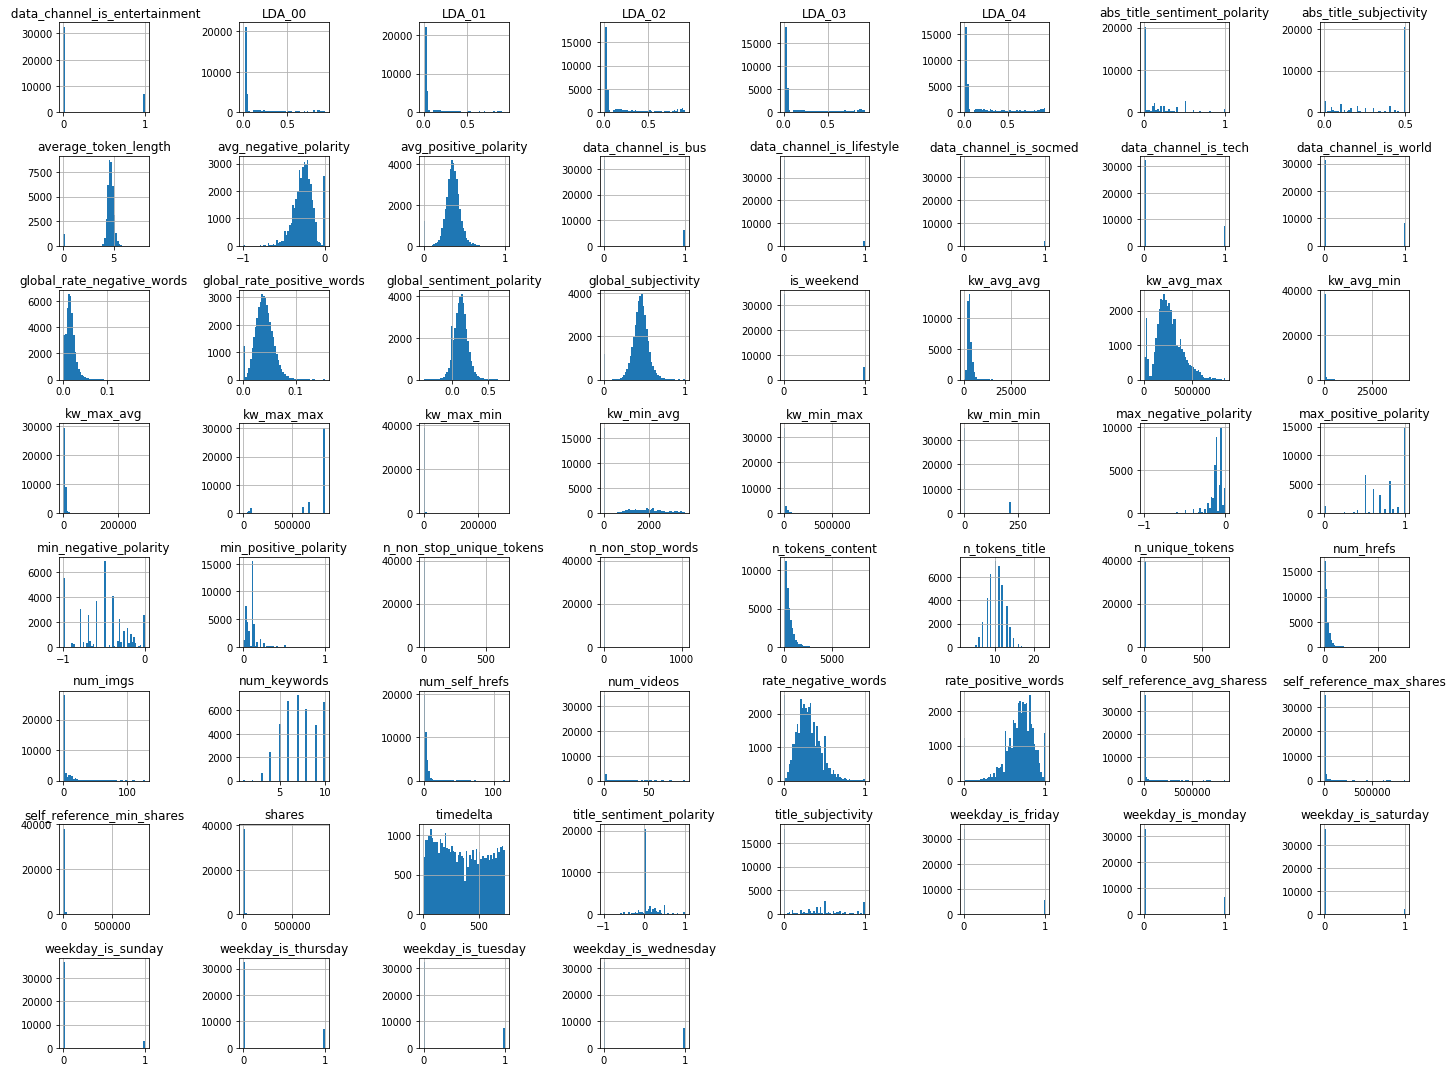

In [9]:
data.hist(bins=50,figsize=(20,15))
plt.tight_layout()
plt.show()


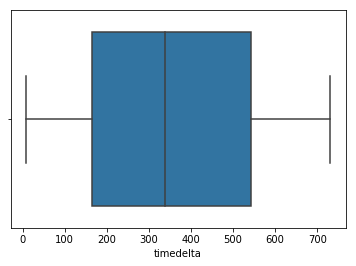

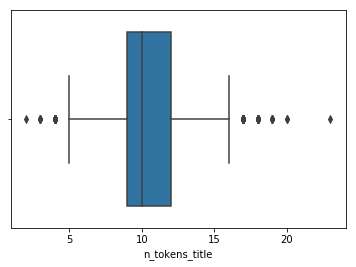

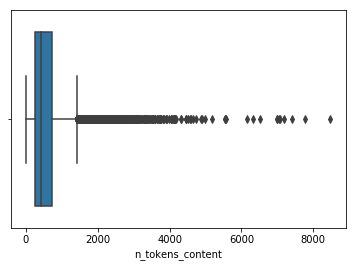

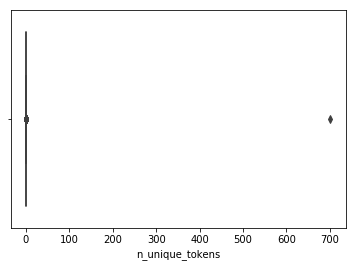

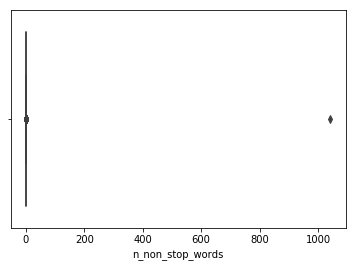

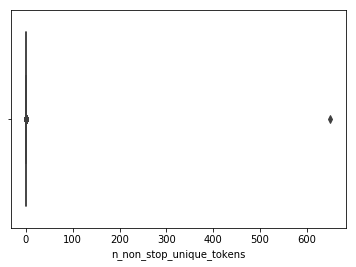

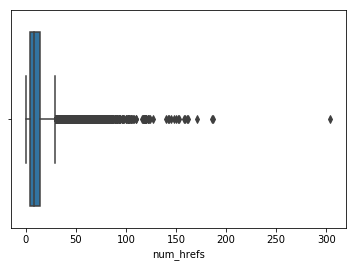

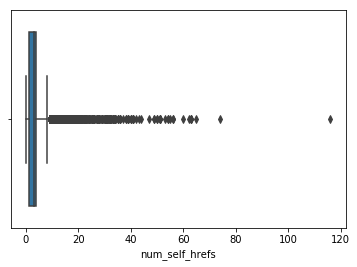

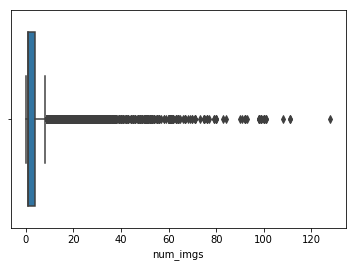

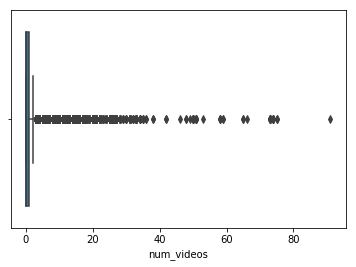

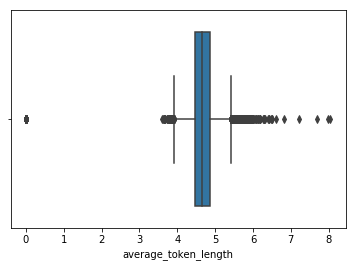

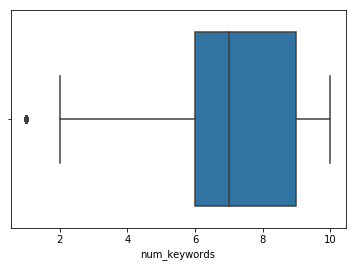

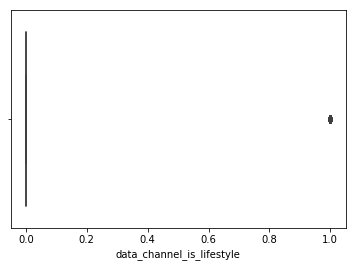

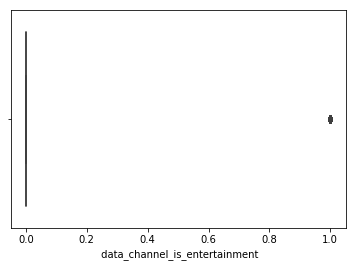

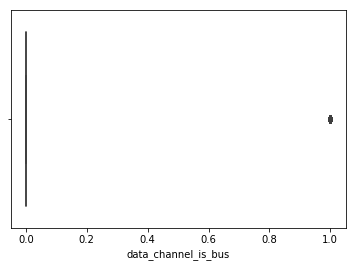

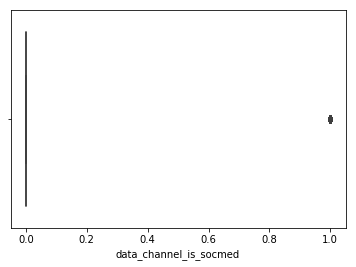

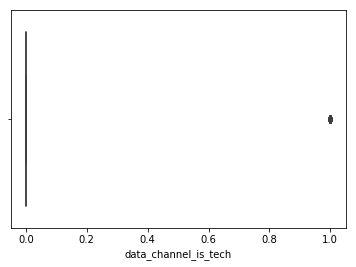

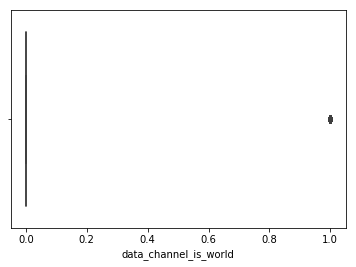

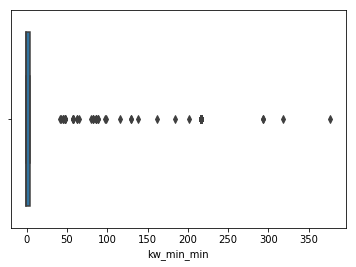

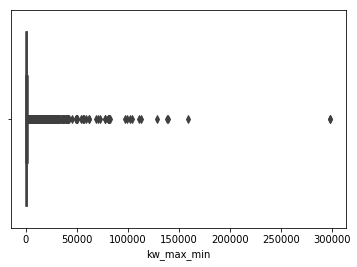

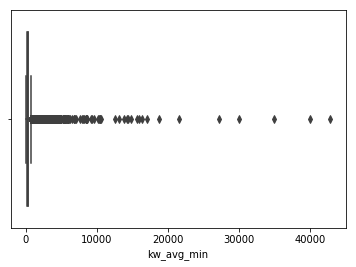

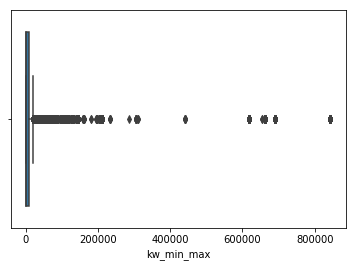

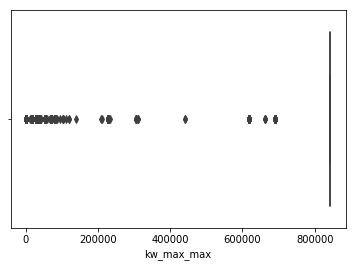

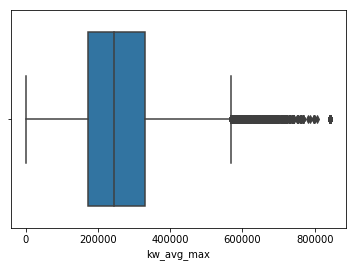

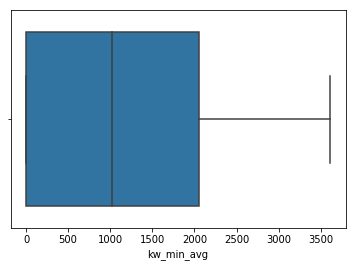

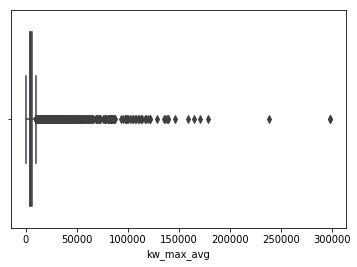

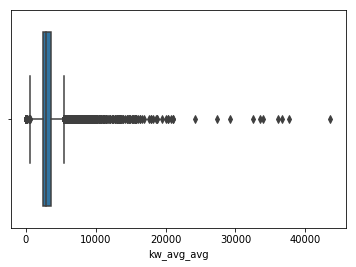

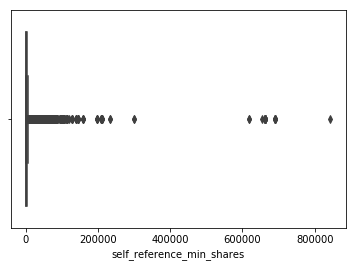

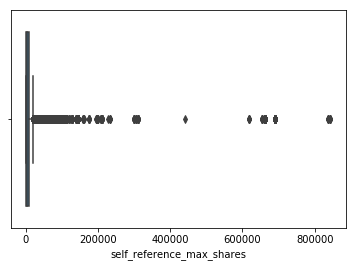

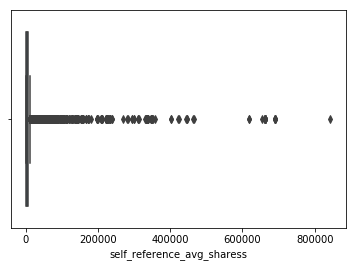

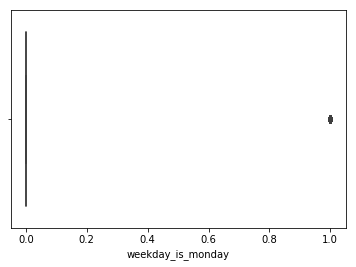

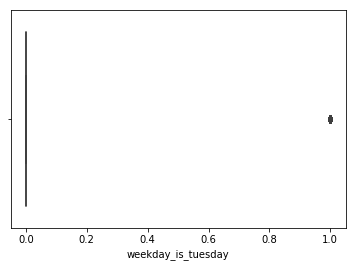

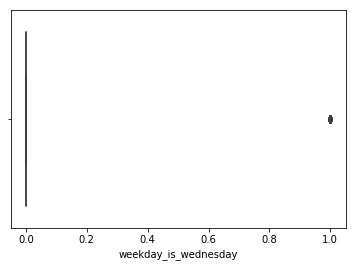

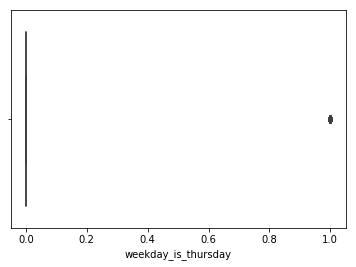

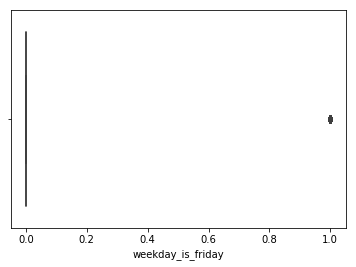

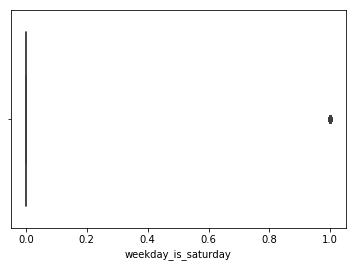

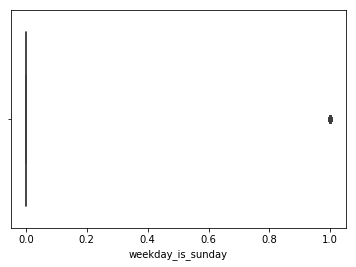

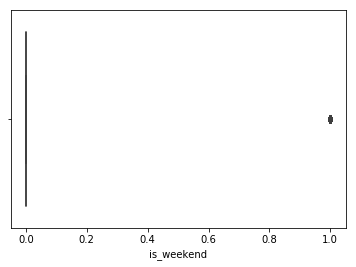

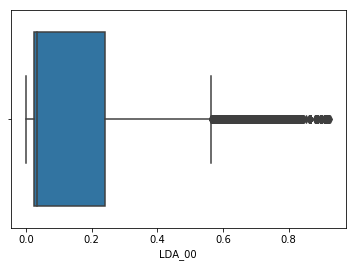

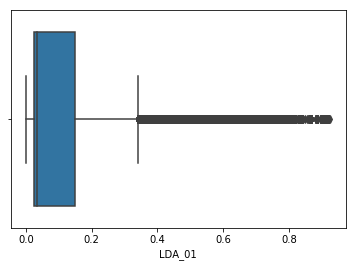

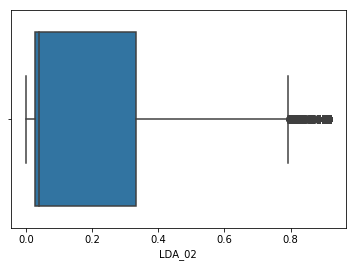

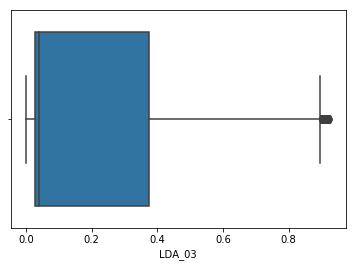

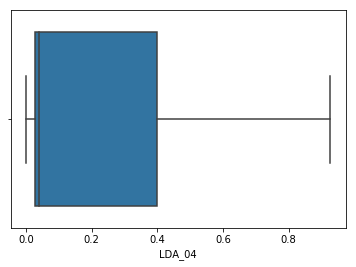

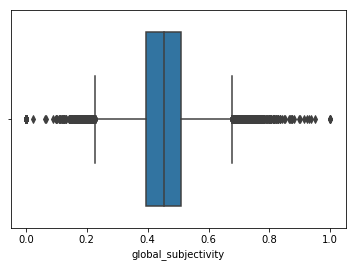

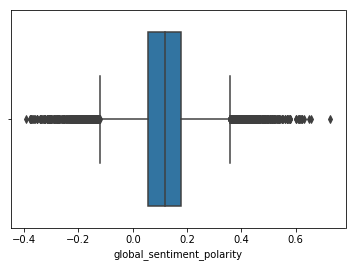

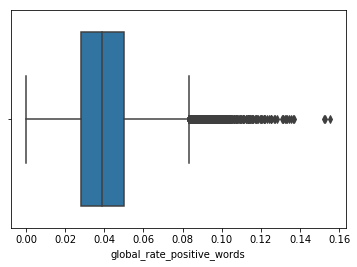

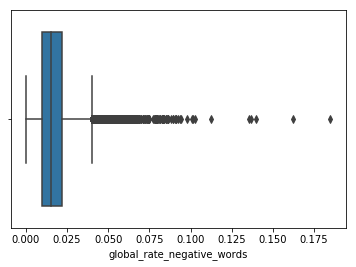

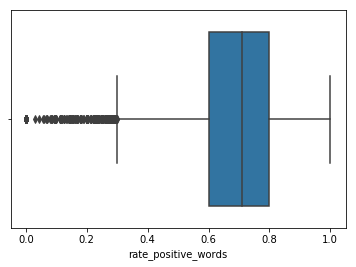

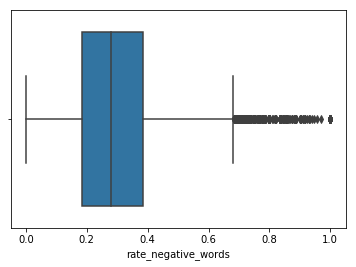

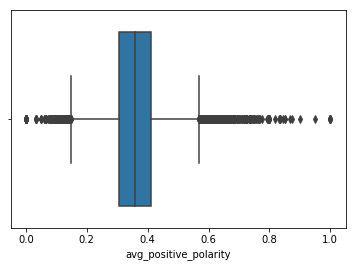

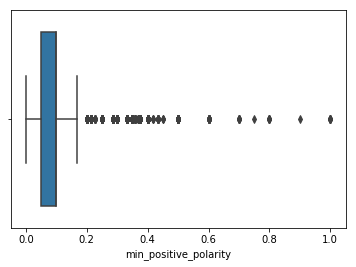

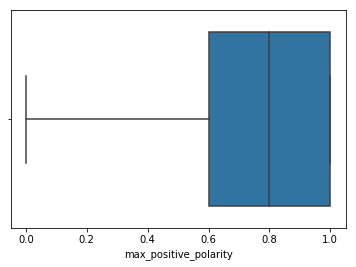

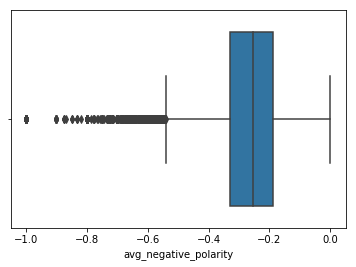

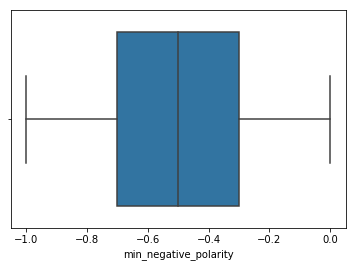

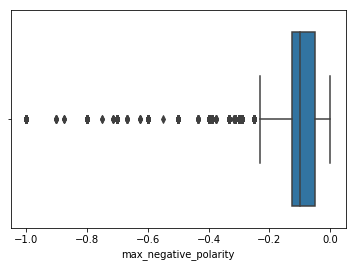

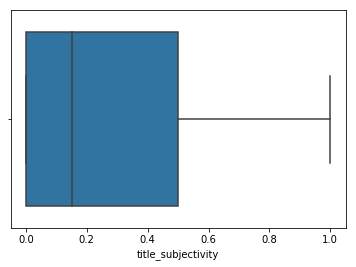

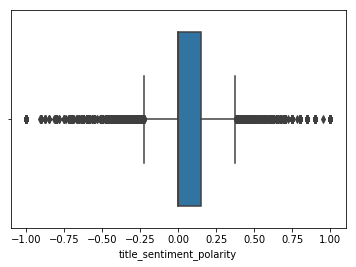

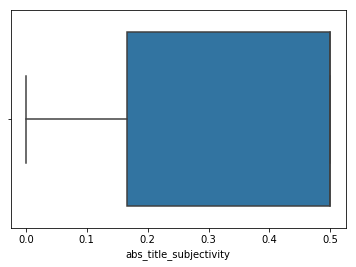

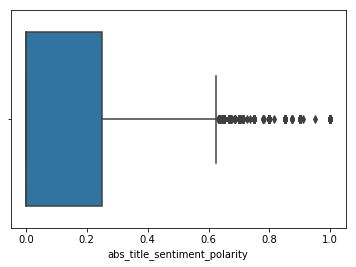

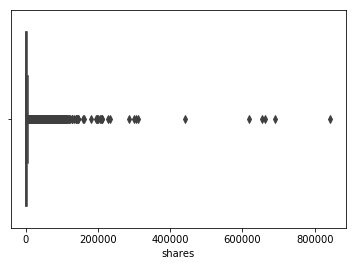

In [10]:
for i in data.columns:
    sns.boxplot(data[i])
    plt.show()

## Check Correlation

In [11]:
data.corr()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.008662
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_unique_tokens,0.003805,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,...,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404
num_self_hrefs,0.064530,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,...,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709,-0.001900
num_imgs,-0.027636,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.039388
num_videos,0.000936,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.023936


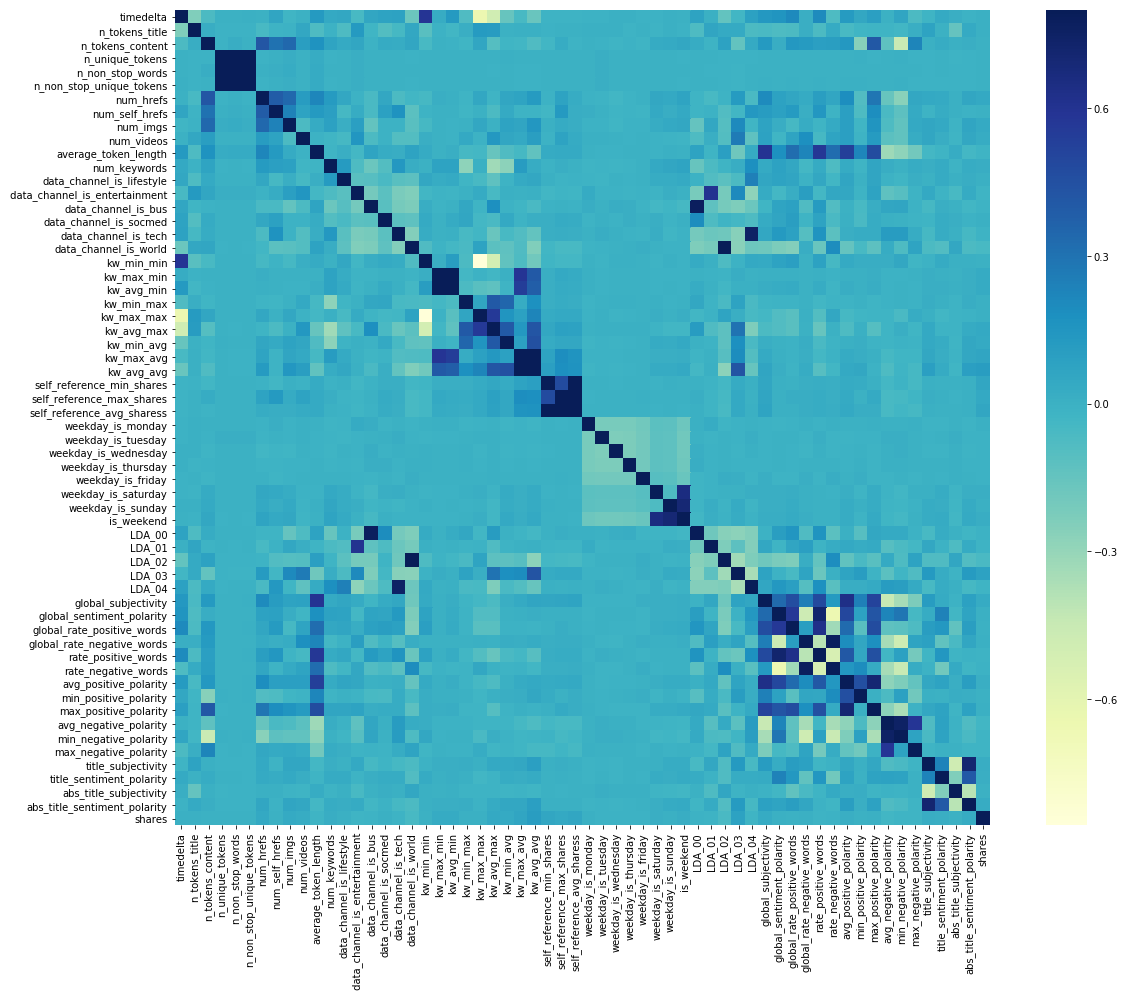

In [12]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(matrix, vmax=.8, square=True, cmap="YlGnBu");

## Feature Selection

In [13]:
data1=data.copy()

In [14]:
A=data1.iloc[:,:-1]
B=data1.iloc[:,-1]

In [15]:
A

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.385965,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.411127,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364
5,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,...,0.350610,0.136364,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286
6,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,0.0,...,0.402039,0.100000,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000
7,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,0.0,...,0.427720,0.100000,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000
8,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,0.0,...,0.566667,0.400000,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000,0.375000,0.000000
9,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,1.0,...,0.298413,0.100000,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000,0.000000


In [16]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
bestfeature = SelectKBest(score_func=f_regression, k=10)
fit = bestfeature.fit(A,B)
dfscore= pd.DataFrame(fit.scores_)
dfcolumns= pd.DataFrame(A.columns)
featurescores = pd.concat([dfcolumns,dfscore],axis=1)
featurescores.columns =['features','score']
featurescores

,features,score
0,timedelta,2.974770
1,n_tokens_title,3.058346
2,n_tokens_content,0.239701
3,n_unique_tokens,0.025775
4,n_non_stop_words,0.007778
5,n_non_stop_unique_tokens,0.000517
6,num_hrefs,81.891755
7,num_self_hrefs,0.143169
8,num_imgs,61.595478
9,num_videos,22.725326


In [17]:
top30feature=featurescores.nlargest(30,'score')
top30feature

,features,score
26,kw_avg_avg,489.239956
41,LDA_03,280.160262
25,kw_max_avg,164.610050
40,LDA_02,139.243446
29,self_reference_avg_sharess,132.830299
27,self_reference_min_shares,124.518921
17,data_channel_is_world,97.360782
28,self_reference_max_shares,88.194845
6,num_hrefs,81.891755
23,kw_avg_max,79.316507


In [18]:
np.array(top30feature['features'])

array(['kw_avg_avg', 'LDA_03', 'kw_max_avg', 'LDA_02',
       'self_reference_avg_sharess', 'self_reference_min_shares',
       'data_channel_is_world', 'self_reference_max_shares', 'num_hrefs',
       'kw_avg_max', 'kw_min_avg', 'num_imgs', 'avg_negative_polarity',
       'global_subjectivity', 'kw_avg_min', 'kw_max_min',
       'abs_title_sentiment_polarity', 'num_videos',
       'average_token_length', 'title_subjectivity', 'num_keywords',
       'max_negative_polarity', 'min_negative_polarity',
       ' data_channel_is_entertainment', 'is_weekend', 'LDA_04',
       'weekday_is_saturday', 'data_channel_is_tech',
       'rate_positive_words', 'title_sentiment_polarity'], dtype=object)

## Make New Dataset with Top 30 features

In [19]:
df=data1[['kw_avg_avg', 'LDA_03', 'kw_max_avg', 'LDA_02',
       'self_reference_avg_sharess', 'self_reference_min_shares',
       'data_channel_is_world', 'self_reference_max_shares', 'num_hrefs',
       'kw_avg_max', 'kw_min_avg', 'num_imgs', 'avg_negative_polarity',
       'global_subjectivity', 'kw_avg_min', 'kw_max_min',
       'abs_title_sentiment_polarity', 'num_videos',
       'average_token_length', 'title_subjectivity', 'num_keywords',
       'max_negative_polarity', 'min_negative_polarity',
       ' data_channel_is_entertainment', 'is_weekend', 'LDA_04',
       'weekday_is_saturday', 'data_channel_is_tech',
       'rate_positive_words', 'title_sentiment_polarity','shares']]

In [20]:
df.head()

,kw_avg_avg,LDA_03,kw_max_avg,LDA_02,self_reference_avg_sharess,self_reference_min_shares,data_channel_is_world,self_reference_max_shares,num_hrefs,kw_avg_max,...,max_negative_polarity,min_negative_polarity,data_channel_is_entertainment,is_weekend,LDA_04,weekday_is_saturday,data_channel_is_tech,rate_positive_words,title_sentiment_polarity,shares
0,0.0,0.041263,0.0,0.040005,496.000000,496.0,0.0,496.0,4.0,0.0,...,-0.200000,-0.600,1.0,0.0,0.040123,0.0,0.0,0.769231,-0.187500,593
1,0.0,0.050101,0.0,0.050096,0.000000,0.0,0.0,0.0,3.0,0.0,...,-0.100000,-0.125,0.0,0.0,0.050001,0.0,0.0,0.733333,0.000000,711
2,0.0,0.033334,0.0,0.033351,918.000000,918.0,0.0,918.0,3.0,0.0,...,-0.133333,-0.800,0.0,0.0,0.682188,0.0,0.0,0.857143,0.000000,1500
3,0.0,0.028905,0.0,0.494651,0.000000,0.0,0.0,0.0,9.0,0.0,...,-0.166667,-0.600,1.0,0.0,0.028572,0.0,0.0,0.666667,0.000000,1200
4,0.0,0.028572,0.0,0.028575,3151.157895,545.0,0.0,16000.0,19.0,0.0,...,-0.050000,-0.500,0.0,0.0,0.885427,0.0,1.0,0.860215,0.136364,505


## Check Correlation

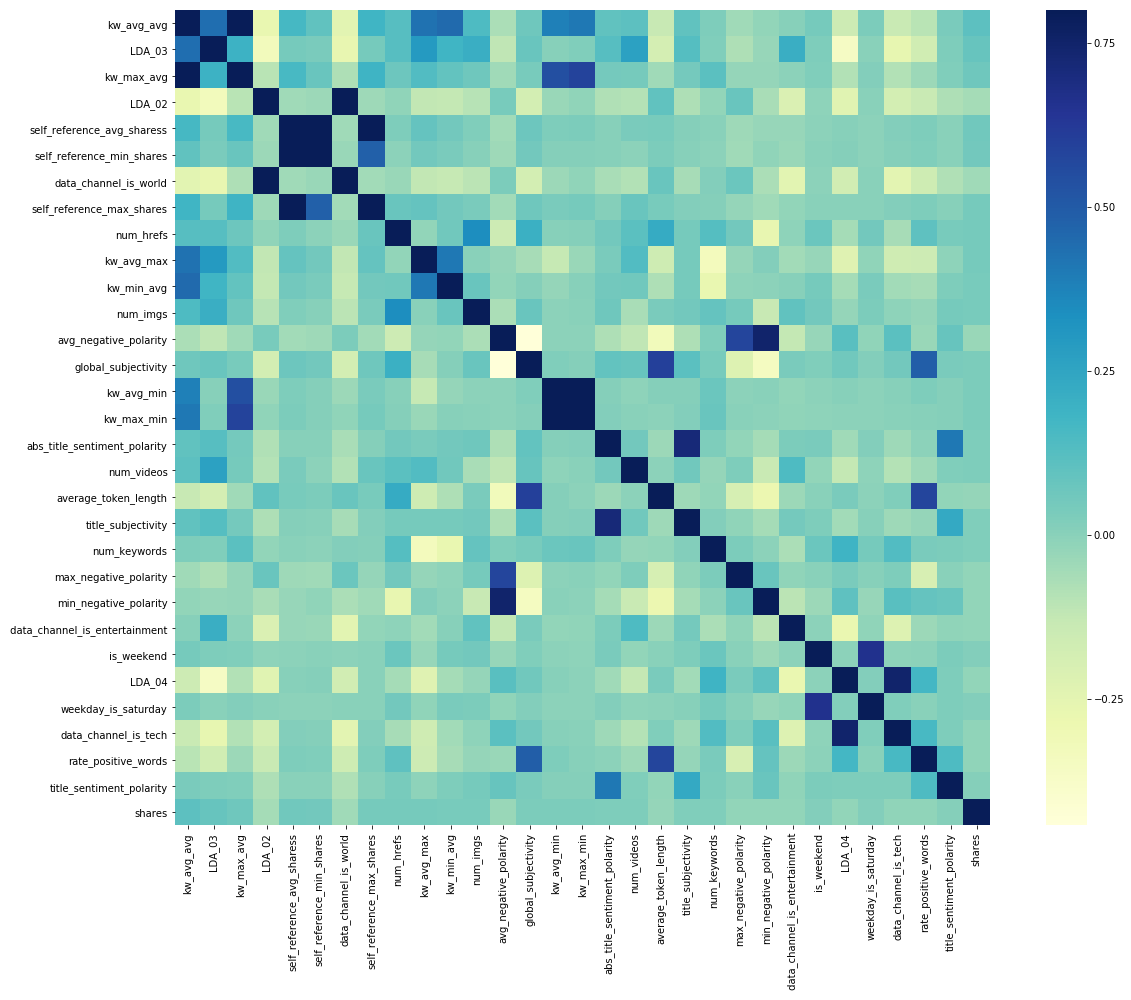

In [21]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(matrix, vmax=.8, square=True, cmap="YlGnBu");

## Train Test Split

In [22]:
x=df.drop("shares",axis=1)
x


,kw_avg_avg,LDA_03,kw_max_avg,LDA_02,self_reference_avg_sharess,self_reference_min_shares,data_channel_is_world,self_reference_max_shares,num_hrefs,kw_avg_max,...,num_keywords,max_negative_polarity,min_negative_polarity,data_channel_is_entertainment,is_weekend,LDA_04,weekday_is_saturday,data_channel_is_tech,rate_positive_words,title_sentiment_polarity
0,0.000000,0.041263,0.000000,0.040005,496.000000,496.0,0.0,496.0,4.0,0.000000,...,5.0,-0.200000,-0.600000,1.0,0.0,0.040123,0.0,0.0,0.769231,-0.187500
1,0.000000,0.050101,0.000000,0.050096,0.000000,0.0,0.0,0.0,3.0,0.000000,...,4.0,-0.100000,-0.125000,0.0,0.0,0.050001,0.0,0.0,0.733333,0.000000
2,0.000000,0.033334,0.000000,0.033351,918.000000,918.0,0.0,918.0,3.0,0.000000,...,6.0,-0.133333,-0.800000,0.0,0.0,0.682188,0.0,0.0,0.857143,0.000000
3,0.000000,0.028905,0.000000,0.494651,0.000000,0.0,0.0,0.0,9.0,0.000000,...,7.0,-0.166667,-0.600000,1.0,0.0,0.028572,0.0,0.0,0.666667,0.000000
4,0.000000,0.028572,0.000000,0.028575,3151.157895,545.0,0.0,16000.0,19.0,0.000000,...,7.0,-0.050000,-0.500000,0.0,0.0,0.885427,0.0,1.0,0.860215,0.136364
5,0.000000,0.022224,0.000000,0.022231,8500.000000,8500.0,0.0,8500.0,2.0,0.000000,...,9.0,-0.100000,-0.400000,0.0,0.0,0.626582,0.0,1.0,0.523810,0.214286
6,0.000000,0.020015,0.000000,0.020024,3151.157895,545.0,0.0,16000.0,21.0,0.000000,...,10.0,-0.050000,-0.500000,0.0,0.0,0.825173,0.0,0.0,0.827957,0.000000
7,0.000000,0.022224,0.000000,0.243435,3151.157895,545.0,0.0,16000.0,20.0,0.000000,...,9.0,-0.050000,-0.500000,0.0,0.0,0.561384,0.0,1.0,0.846939,0.500000
8,0.000000,0.029696,0.000000,0.028662,0.000000,0.0,0.0,0.0,2.0,0.000000,...,7.0,-0.125000,-0.125000,0.0,0.0,0.454412,0.0,1.0,0.600000,0.000000
9,0.000000,0.040001,0.000000,0.839997,0.000000,0.0,1.0,0.0,4.0,0.000000,...,5.0,-0.100000,-0.500000,0.0,0.0,0.040002,0.0,0.0,0.562500,0.000000


In [23]:
y=df['shares']
y

0          593
1          711
2         1500
3         1200
4          505
5          855
6          556
7          891
8         3600
9          710
10        2200
11        1900
12         823
13       10000
14         761
15        1600
16       13600
17        3100
18        5700
19       17100
20        2800
21         598
22         445
23        1500
24         852
25         783
26        1500
27        1800
28         462
29         425
         ...  
39614     1400
39615     5700
39616     2100
39617      691
39618     1400
39619     1200
39620     2400
39621    24300
39622     2900
39623      947
39624     3200
39625     1400
39626     1100
39627     1200
39628     1000
39629     2400
39630     1500
39631      914
39632     1700
39633     1500
39634     1000
39635     1300
39636     1700
39637     1400
39638     1200
39639     1800
39640     1900
39641     1900
39642     1100
39643     1300
Name: shares, Length: 39644, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

## Choose Best Model, MSE , RMSE

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

models=[("LR",LinearRegression()),("DTR",DecisionTreeRegressor()),("RF",RandomForestRegressor()),("SVM",SVR()),("KNN",KNeighborsRegressor())]

for name, model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    MSE=mean_squared_error(y_test,y_pred)
    RMSE=np.sqrt(MSE)
    print(name,RMSE)

LR 10836.410654795462
DTR 19832.328894954677
RF 11809.849579038493
SVM 11152.73304338936
KNN 11654.03457882005


## Using K-Fold Cross Validation , RMSE

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

models1=[("LR",LinearRegression()),("DTR",DecisionTreeRegressor()),("RF",RandomForestRegressor()),("SVM",SVR()),("KNN",KNeighborsRegressor())]    


for name, model in models1:
    kf = KFold(n_splits=10, random_state=7)    
    cv_results = cross_val_score(model, x_train, y_train, cv=kf, scoring="neg_mean_squared_error")
    score=np.sqrt(-cv_results)    
    print(name, score.mean(),score.std())
    #print(msg)

LR 10824.586081709578 4393.181728165434
DTR 18654.09185922444 3302.312228492703
RF 11755.445589508829 4146.0586962322695
SVM 11140.301231662128 4329.736609283388
KNN 11966.768985135312 4060.4981179536303


## Feature Scaling with K-fold Cross-validation
Standardization , RMSE

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipelines = []

pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
   LinearRegression())])))
pipelines.append(('ScaledDTR', Pipeline([('Scaler', StandardScaler()),('DTR',
   DecisionTreeRegressor())])))
pipelines.append(("ScaledRFR", Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVR())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
   KNeighborsRegressor())])))

for name, model in pipelines:    
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
    score=np.sqrt(-cv_results)    
    print(name, score.mean(), score.std())
    

ScaledLR 10824.586081709385 4393.181728165461
ScaledDTR 17744.962097518222 4284.763337880719
ScaledRFR 12011.59823012723 4077.2523010863138
ScaledSVM 11111.184310334942 4336.147654672713
ScaledKNN 11835.027685704748 3942.9096920343814


## Linear Regression is the Best Model